<a href="https://colab.research.google.com/github/thebellaproject/houseprediction/blob/main/House_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score as r2
from sklearn import ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
#read train dan test data
df=pd.read_csv('/content/train.csv')
df5=pd.read_csv('/content/test.csv')

In [ ]:
#because the test data doesn't have SalePrice column, so we will copy the SalePrice column in train data to test data
df5['SalePrice'] = df['SalePrice']

In [ ]:
combine = pd.concat([df, df5], keys=[0,1])
combine = combine.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
combine = combine.drop(["YrSold","YearRemodAdd","YearBuilt"],axis=1)

In [ ]:
td=pd.get_dummies(combine)

In [ ]:
print(td.shape)

(2919, 274)


In [ ]:
td["SalePrice"].head()

0  0    208500
   1    181500
   2    223500
   3    140000
   4    250000
Name: SalePrice, dtype: int64

In [ ]:
# Fill in the NaN column with number and str

count2 = td.isnull().sum()

NaN2 = []
for i in range (0, len(count2)):
  if count2[i] > 0:
    NaN2.append(td.columns[i])

#If the dtype is 'float64' and 'int64' then the NaN will be filled by mean, if the type of column is 'object' then the NaN will be filled by 'X'
for j in NaN2:
  if td[NaN2][j].dtypes == 'float64':
    td[j] = td[j].fillna(td[j].mean())
  elif td[NaN2][j].dtypes == 'int64':
    td[j] = td[j].fillna(td[j].mean())
  elif td[NaN2][j].dtypes == 'object':
    td[j] = td[j].fillna('X')

In [ ]:
numerical = []

for i in range(0, len(df.dtypes)):
    if df.dtypes[i] == 'int64':
      numerical.append(df.columns[i])

In [ ]:
for col in ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']:
    td[col] = td[col].astype('int64')

In [ ]:
train = td.xs(0)
testd = td.xs(1)
test = td.xs(1).drop(['SalePrice'],axis=1)

In [ ]:
print(train.shape)
print(test.shape)

(1460, 274)
(1459, 273)


In [ ]:
corr = train.corr()

In [ ]:
#Correlation with output variable
cor_target = abs(corr["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.6]
relevant_features

OverallQual    0.790982
TotalBsmtSF    0.613581
1stFlrSF       0.605852
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64

**Heatmap**

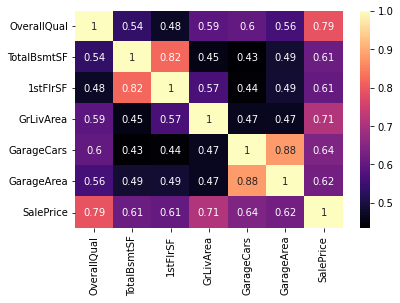

In [ ]:
#Display the heatmap
sns.heatmap(train[['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'SalePrice']].corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

**Scatter Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


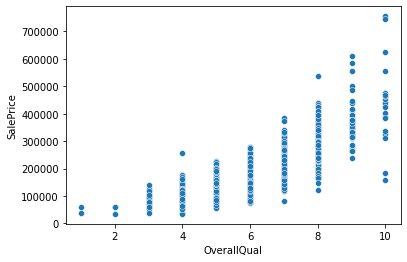

In [ ]:
#Display the scatterplot of SalPrice vs OverallQual
sns.scatterplot(train['OverallQual'],train["SalePrice"],ci=99)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


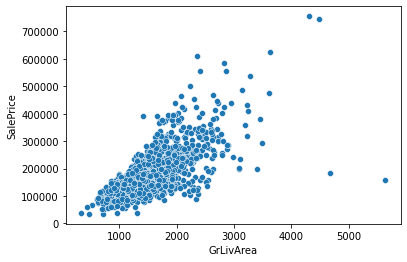

In [ ]:
#Display the scatterplot of SalPrice vs GrLivArea
sns.scatterplot(train['GrLivArea'],train["SalePrice"],ci=99)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


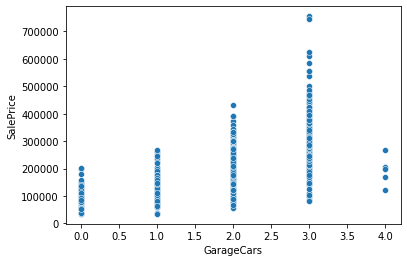

In [ ]:
#Display the scatterplot of SalPrice vs GarageCars
sns.scatterplot(train['GarageCars'],train["SalePrice"],ci=99)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


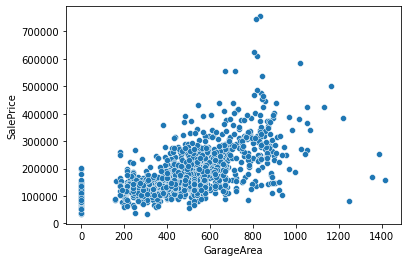

In [ ]:
#Display the scatterplot of SalPrice vs GarageArea
sns.scatterplot(train['GarageArea'],train["SalePrice"],ci=99)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


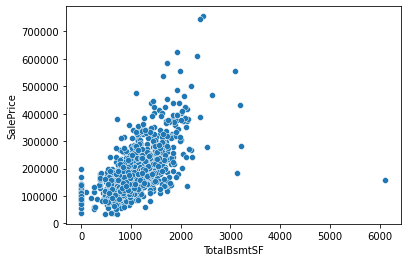

In [ ]:
#Display the scatterplot of SalPrice vs TotalBsmtSF
sns.scatterplot(train['TotalBsmtSF'],train["SalePrice"],ci=99)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


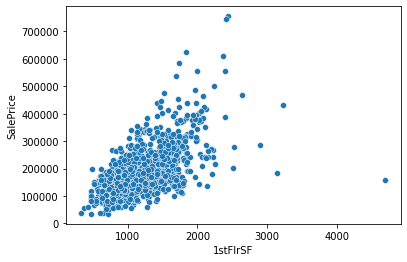

In [ ]:
#Display the scatterplot of SalPrice vs 1stFlrSF
sns.scatterplot(train['1stFlrSF'],train["SalePrice"],ci=99)

In [ ]:
label = train["SalePrice"]
data = train.drop(["Id","SalePrice"],axis=1).fillna(train.mean())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (data, label,
                                                     test_size = 0.2,
                                                    random_state = 42)

In [ ]:
X_train, y_train = data, label

In [ ]:
lin_model = LinearRegression()
lin_model = lin_model.fit(X_train, y_train)

In [ ]:
Y_train_predict = lin_model.predict(X_train)
LR_rmse = (np.sqrt(mean_squared_error(y_train, Y_train_predict)))
print('R-Squared of LR model is {}'.format(r2(y_train, Y_train_predict)))
print('RMSE of LR model is {}'.format(LR_rmse))

R-Squared of LR model is 0.9300416421847619
RMSE of LR model is 21005.060640686705


In [ ]:
#test_x = testd[feat]
LR_predict = lin_model.predict(test.drop(["Id"],axis=1))

In [ ]:
LR_data = pd.DataFrame({"ID":df5["Id"],"SalePrice":LR_predict})
LR_data.head()

,ID,SalePrice
0,1461,113799.706888
1,1462,166409.306477
2,1463,187849.376501
3,1464,195333.523374
4,1465,207483.126453


In [ ]:
label = train["SalePrice"]
data = train.drop(["Id","SalePrice"],axis=1).fillna(train.mean())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (data, label,
                                                     test_size = 0.2,
                                                    random_state = 42)

In [ ]:
X_train, y_train = data, label

In [ ]:
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth=5, min_samples_split=2, learning_rate=0.1, loss='ls')

In [ ]:
clf_fit = clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


In [ ]:
train_p = clf_fit.predict(X_train)
GBR_rmse = (np.sqrt(mean_squared_error(y_train, train_p)))
print('R-Squared of GBR model is {}'.format(r2(y_train, train_p)))
print('RMSE of GBR model is {}'.format(GBR_rmse))

R-Squared of GBR model is 0.9991999689946147
RMSE of GBR model is 2246.2471842362843


In [ ]:
GBR_pred = clf_fit.predict(test.drop(["Id"],axis=1))

In [ ]:
GBR_data = pd.DataFrame({"ID":df5["Id"],"SalePrice":GBR_pred})
GBR_data.head()

,ID,SalePrice
0,1461,126334.041930
1,1462,160123.367907
2,1463,188964.773347
3,1464,192459.155336
4,1465,184776.114283


Diantara kedua model, diperoleh informasi:


*   RMSE of GBR model is 2246.2471842362834
*   RMSE of LR model is 21005.060640686705

dimana RMSE GBR model < RMSE OLS model sehingga GBR model paling baik dalam prediksi



*   Percobaan menggunakan feature yang memiliki nilai abs korelasi terhadap SalePrice di atas 0.6


*   Feature yang digunakan : ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']











In [ ]:
feat = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']
x = train[feat]
y = train['SalePrice']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train, y_train = x, y

In [ ]:
lin_model = LinearRegression()
lin_model = lin_model.fit(X_train, y_train)

In [ ]:
Y_train_predict = lin_model.predict(X_train)
LR_rmse = (np.sqrt(mean_squared_error(y_train, Y_train_predict)))
print('R-Squared of LR model is {}'.format(r2(y_train, Y_train_predict)))
print('RMSE of LR model is {}'.format(LR_rmse))

R-Squared of LR model is 0.7619179511862831
RMSE of LR model is 38749.621260535234


In [ ]:
columns = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']
test = test.reindex(columns=columns)
test[columns] = test[columns].astype(int)

In [ ]:
#test_x = testd[feat]
LR_predict = lin_model.predict(test)

In [ ]:
LR_data = pd.DataFrame({"ID":df5["Id"],"SalePrice":LR_predict})
LR_data.head()

,ID,SalePrice
0,1461,113457.503265
1,1462,165325.401681
2,1463,157177.041113
3,1464,179836.887801
4,1465,227017.198181


In [ ]:
clf1 = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth=5, min_samples_split=2, learning_rate=0.1, loss='ls')

In [ ]:
clf1_fit = clf1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


In [ ]:
train_p = clf1_fit.predict(X_train)
GBR_rmse = (np.sqrt(mean_squared_error(y_train, train_p)))
print('R-Squared of GBR model is {}'.format(r2(y_train, train_p)))
print('RMSE of GBR model is {}'.format(GBR_rmse))

R-Squared of GBR model is 0.9937180181498382
RMSE of GBR model is 6294.372997048406


In [ ]:
columns = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']
test = test.reindex(columns=columns)
test[columns] = test[columns].astype(int)

In [ ]:
GBR1_pred = clf1_fit.predict(test)

In [ ]:
GBR1_data = pd.DataFrame({"ID":df5["Id"],"SalePrice":GBR1_pred})
GBR1_data.head()

,ID,SalePrice
0,1461,128820.946143
1,1462,154920.041693
2,1463,158040.998062
3,1464,184060.076897
4,1465,230854.703491




*   Nilai RMSE yang diperoleh masing-masing:

1.   LR model: 38749.621260535234
2.   GBR model: 6294.372997048406 







